In [28]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import importlib# import lane_lines.calibration
# importlib.reload(lane_lines.calibration)
from lane_lines.calibration import load_calibration
from lane_lines import gradient
from lane_lines import color

cam_matrix, dist_coeff = load_calibration('camera_cal')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Undistort Image

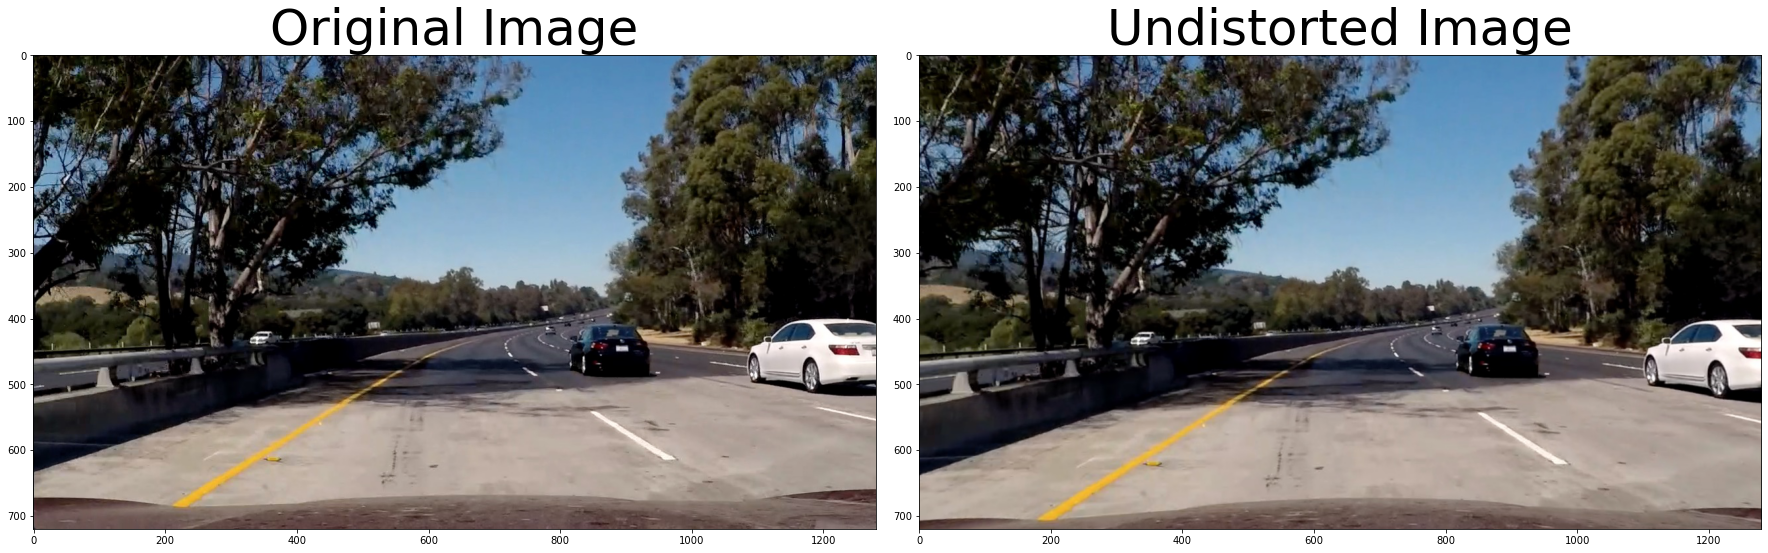

In [154]:
img_orig = mpimg.imread('test_images/test5.jpg')

img_undist = cv2.undistort(img_orig, cam_matrix, dist_coeff, None, cam_matrix)    

cv2.imwrite('und.jpg', img_orig)
                   
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_orig)#,cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(img_undist, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Thresholding

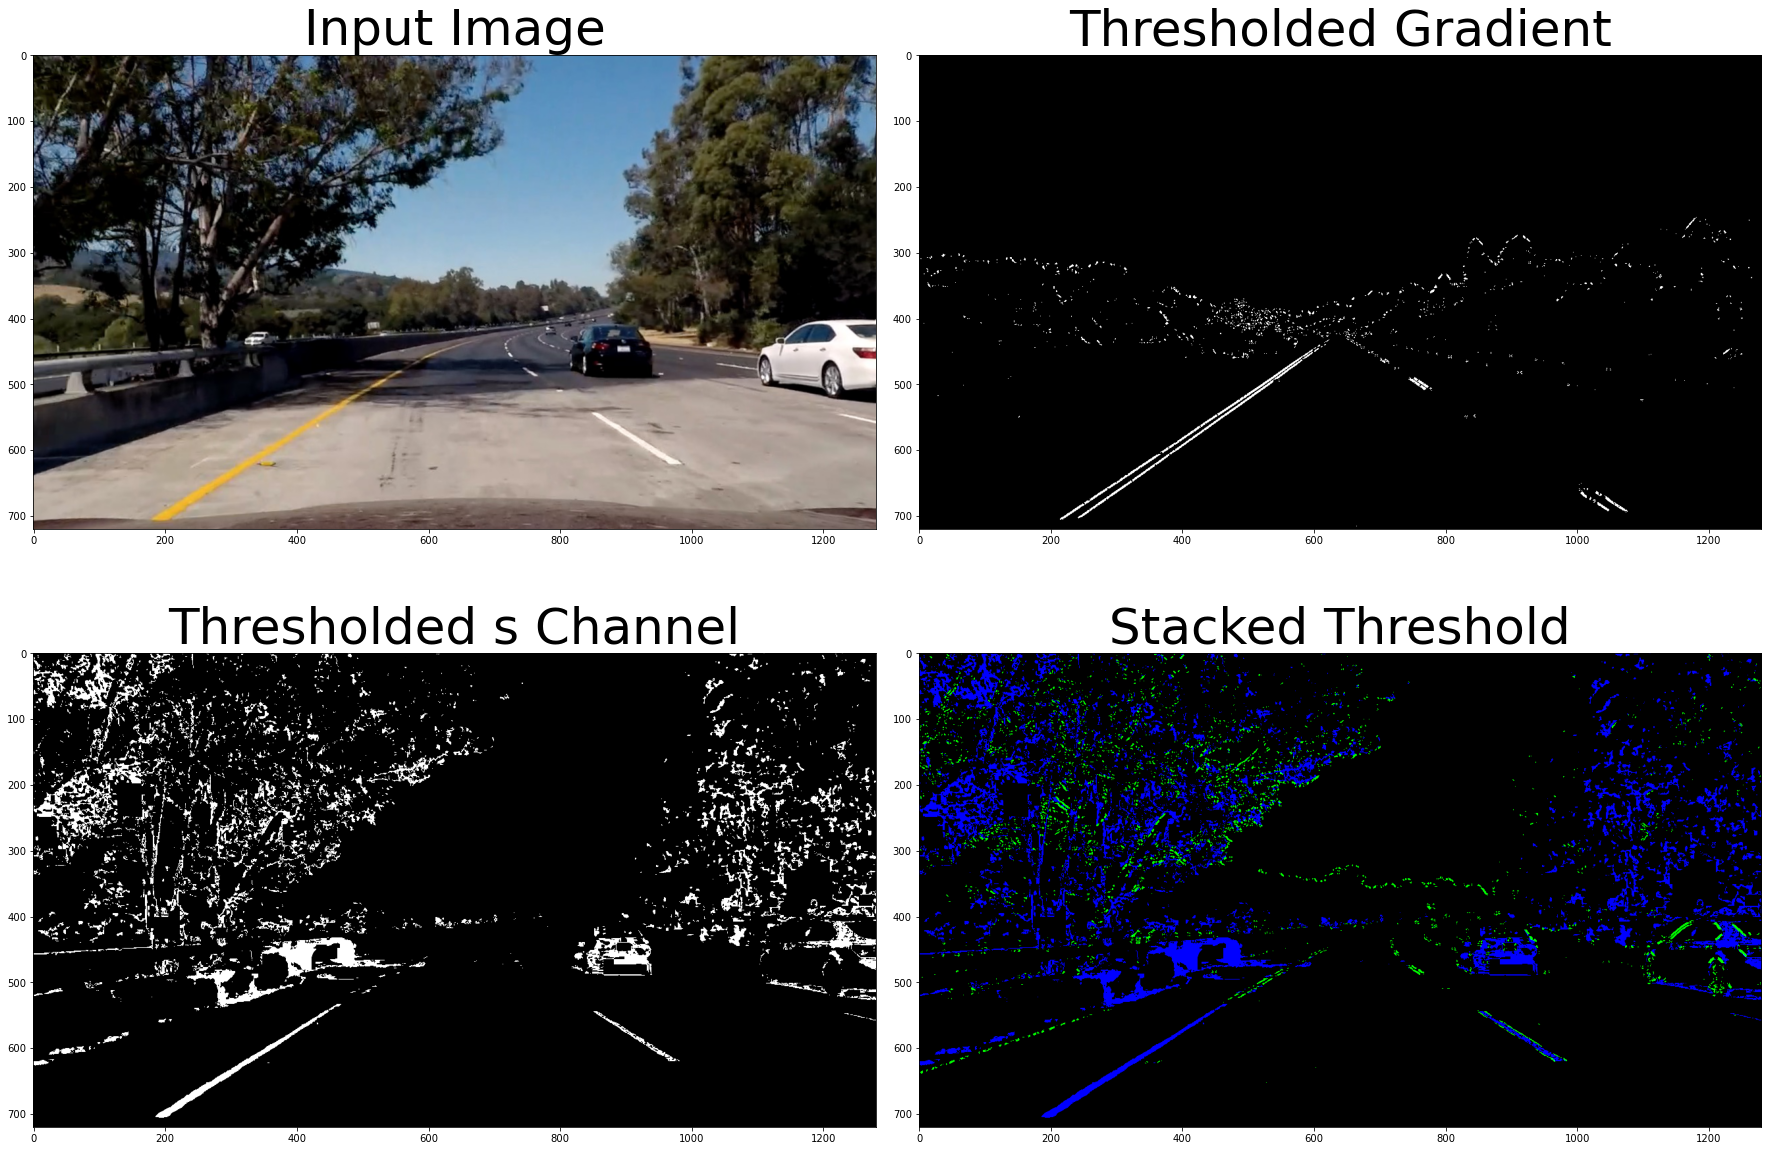

In [162]:
grad_thres_binary = gradient.mag_dir_thresh(img_undist, sobel_kernel=5,
                                      mag_thres=(60, 255), dir_thres=(30, 70), degrees=True)
color_thres_binary = color.hls_thresh(img_undist, channel='s', thresh=(180, 255))
combined_thres_binary = grad_thres_binary + color_thres_binary
combined_thres_binary[combined_thres_binary > 1] = 1
color_binary = np.dstack(( np.zeros_like(grad_thres_binary),
                          grad_thres_binary, color_thres_binary))
# Plot the result
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))
f.tight_layout()
ax1.imshow(img_undist)
ax1.set_title('Input Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
ax3.imshow(color_thres_binary, cmap='gray')
ax3.set_title('Thresholded s Channel', fontsize=50)
ax4.imshow(color_binary)#, cmap='gray')
ax4.set_title('Stacked Threshold', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Perspektive Transform

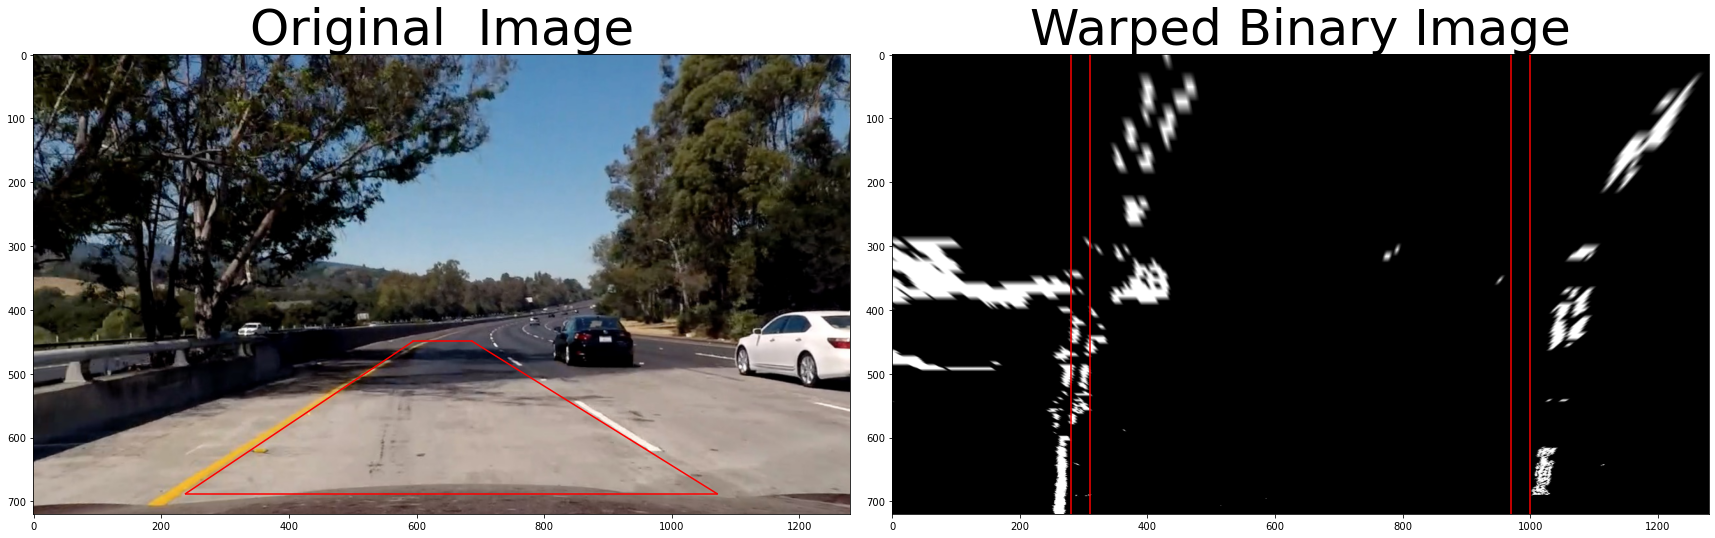

In [163]:
src = np.float32([[238, 688] , [1071, 688] ,[595, 449],[687, 449]])
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
dst = np.float32([[280, 720] , [1000, 720] ,[280, 0],[1000, 0]])

M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(combined_thres_binary, M, combined_thres_binary.shape[1::-1],
                             flags=cv2.INTER_LINEAR)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_undist, cmap='gray')
ax1.set_title('Original  Image', fontsize=50)
ax1.plot([src[0][0], src[1][0]], [src[0][1], src[1][1]], color='red')
ax1.plot([src[1][0], src[3][0]], [src[1][1], src[3][1]], color='red')
ax1.plot([src[3][0], src[2][0]], [src[3][1], src[2][1]], color='red')
ax1.plot([src[0][0], src[2][0]], [src[0][1], src[2][1]], color='red')
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped Binary Image', fontsize=50)
ax2.axvline(280, color='red')
ax2.axvline(310, color='red')
ax2.axvline(970, color='red')
ax2.axvline(1000, color='red')


#  plt.axline((x1, y1), (x2, y2))

## Color Channel Thresholding

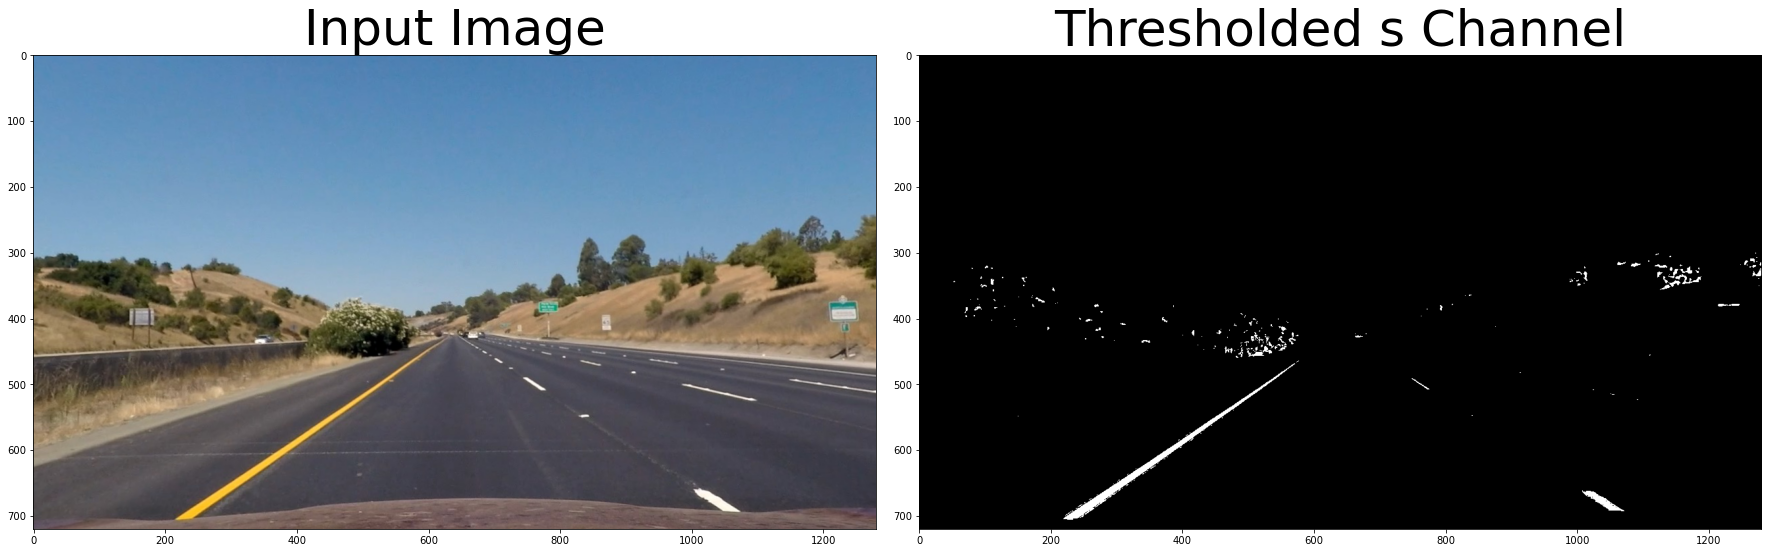

In [39]:
color_thres_binary = color.hls_thresh(img_undist, channel='s', thresh=(160, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_undist)
ax1.set_title('Input Image', fontsize=50)
ax2.imshow(color_thres_binary, cmap='gray')
ax2.set_title('Thresholded s Channel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Combination

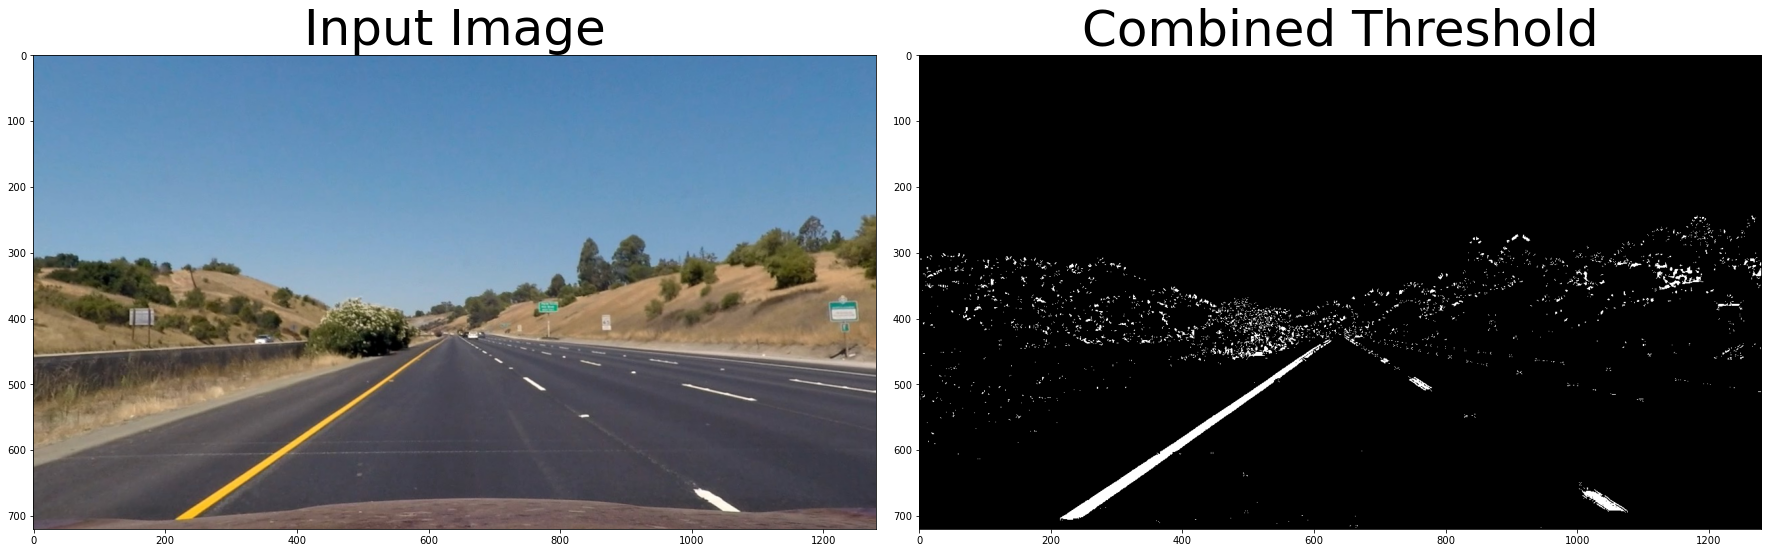

In [40]:
combined_thres_binary = combined + color_thres_binary
combined_thres_binary[combined_thres_binary > 1] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_undist)
ax1.set_title('Input Image', fontsize=50)
ax2.imshow(combined_thres_binary, cmap='gray')
ax2.set_title('Combined Threshold', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)